Розробити типи для облiку продаж товарiв у супермаркетi. Асортимент подано перелiком товарiв, якi характеризуються iдентифiкацiйним номе- ром, назвою, категорiєю та належнiстю до акцiйної групи (так/нi). Цiни товарiв визначаються тарифiкацiйним перелiком, де кожному iдентифiка- цiйному номеру поставлено у вiдповiднiсть цiну за одиницю товару. При розрахунках реальна цiна акцiйного товару становить половину тарифної. Данi продаж характеризуються iдентифiкацiйним номером проданого това- ру та кiлькiстю одиниць. Асортимент та тарифи подано окремими файлами. Продажi також подано кiлькома (> одного) окремими файлами. Викори- стовуючи pandas:
0. Побудувати датафрейм з iнформацiєю про усi проданi товари.<br>
1. Отримати у категорiї ПРОДАНИХ товарiв, яку вибирати з випадаю- чого списку, для кожної назви виручену суму у форматi < назва товару - сума >.
2. Отримати для кожної категорiї ПРОДАНИХ товарiв виручену суму у форматi < категорiя - сума >.<br>
2а. Побудувати дiаграму виручених сум по категорiях.<br>
3. Отримати у кожнiй категорiї ПРОДАНИХ товарiв назви товарiв з найбiльшою вирученою сумою у форматi < назва товару - сума >.<br>
4. У категорiї ПРОДАНИХ товарiв, яку вибирати з випадаючого списку, для кожного з проданих товарiв акцiйної групи отримати кiлькiсть продаж та виручену суму.<br>
5. Отримати загальну суму ПРОДАНИХ товарiв.<br>
6. Отримати перелiк товарiв для кожної категорiї, якi не продавалися. <br>

In [474]:
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import csv
from matplotlib import pyplot as plt

In [475]:
assortment = pd.read_csv("assortment.csv")
assortment

,Number,Title,Category,Promotional
0,12345,title1,category1,yes
1,34567,title2,category1,yes
2,56789,title3,category2,no
3,78912,title4,category3,yes
4,91234,title5,category3,no
5,23456,title6,category2,yes


In [476]:
tarifs = pd.read_csv("tarifs.csv")
tarifs

,Number,Price
0,12345,100
1,34567,150
2,56789,75
3,78912,200
4,91234,125
5,23456,300


In [477]:
sales1 = pd.read_csv("sales1.csv")
sales1

,Number,Amount
0,12345,5
1,34567,4
2,56789,2
3,12345,3
4,78912,1
5,12345,1
6,91234,3
7,34567,2


In [478]:
sales2 = pd.read_csv("sales2.csv")
sales2

,Number,Amount
0,91234,3
1,91234,2
2,78912,1
3,12345,1
4,78912,5
5,34567,5
6,56789,7


In [479]:
sales = [sales1, sales2]
sales = pd.concat(sales, ignore_index=True)
sales

,Number,Amount
0,12345,5
1,34567,4
2,56789,2
3,12345,3
4,78912,1
5,12345,1
6,91234,3
7,34567,2
8,91234,3
9,91234,2


### 0.
Побудувати датафрейм з iнформацiєю про усi проданi товари.

In [480]:
df = pd.merge(sales, assortment)
df = df.merge(tarifs)
df

,Number,Amount,Title,Category,Promotional,Price
0,12345,5,title1,category1,yes,100
1,12345,3,title1,category1,yes,100
2,12345,1,title1,category1,yes,100
3,12345,1,title1,category1,yes,100
4,34567,4,title2,category1,yes,150
5,34567,2,title2,category1,yes,150
6,34567,5,title2,category1,yes,150
7,56789,2,title3,category2,no,75
8,56789,7,title3,category2,no,75
9,78912,1,title4,category3,yes,200


### 1.
Отримати у категорiї ПРОДАНИХ товарiв, яку вибирати з випадаю-чого списку, для кожної назви виручену суму у форматi < назва товару -сума >.

In [481]:
categories = set(df["Category"])

def choose1(Category):
    df1 = df.copy()
    df1 = df1[df.Category == Category]
    df1.loc[(df1.Promotional == "yes"), "Price"] = df1["Price"] / 2
    df1["Price"] = df1["Price"] * df1["Amount"]
    df1 = df1.loc[:, ['Title', 'Price']]
    df1 = df1.groupby(["Title"]).sum()
    display(df1)

interact(choose1, Category=categories);

interactive(children=(Dropdown(description='Category', options=('category1', 'category2', 'category3'), value=…

### 2. 
Отримати для кожної категорiї ПРОДАНИХ товарiв виручену суму у форматi < категорiя - сума >.<br>
2а. Побудувати дiаграму виручених сум по категорiях.

,Price
Category,
category1,1325.0
category2,675.0
category3,1700.0


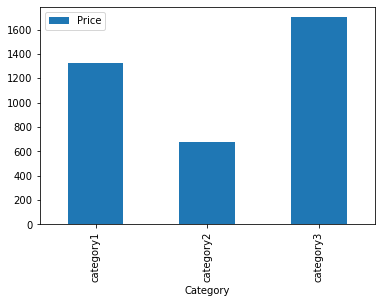

In [482]:
df2 = df.copy()
df2.loc[(df2.Promotional == "yes"), "Price"] = df2["Price"] / 2
df2["Price"] = df2["Price"] * df2["Amount"]
df2 = df2.loc[:, ['Category', 'Price']]
df2 = df2.groupby(["Category"]).sum()
display(df2)
df2.plot(kind = 'bar')

### 3.
Отримати у кожнiй категорiї ПРОДАНИХ товарiв назви товарiв знайбiльшою вирученою сумою у форматi < назва товару - сума >.


In [483]:
df3 = df.copy()
df3.loc[(df3.Promotional == "yes"), "Price"] = df3["Price"] / 2
df3["Price"] = df3["Price"] * df3["Amount"]
df3 = df3.loc[:, ['Category', 'Title', 'Price']]
df3 = df3.groupby(["Category", "Title"]).sum()
df3 = df3.reset_index()
df3 = df3.groupby(["Category"]).max()
display(df3)


,Title,Price
Category,,
category1,title2,825.0
category2,title3,675.0
category3,title5,1000.0


###  4.
У категорiї ПРОДАНИХ товарiв, яку вибирати з випадаючого списку, для кожного з проданих товарiв акцiйної групи отримати кiлькiсть продаж та виручену суму.

In [484]:
categories = set(df["Category"])

def choose4(Category):
    df4 = df.copy()
    df4 = df4[(df4.Category == Category) & (df4.Promotional == "yes")]
    df4["Price"] = df4["Price"] / 2
    df4["Final price"] = df4["Price"] * df4["Amount"]
    df4 = df4.groupby(["Category", "Title"]).agg({"Final price":"sum", "Amount":"sum"})
    display(df4)

interact(choose4, Category=categories);

interactive(children=(Dropdown(description='Category', options=('category1', 'category2', 'category3'), value=…

### 5. 
Отримати загальну суму ПРОДАНИХ товарiв.

In [485]:
 prices_df = df.copy()
 prices_df.loc[prices_df.Promotional == "yes", "Price"] = prices_df["Price"] / 2
 prices_df = (prices_df["Price"] * prices_df["Amount"])
 print(prices_df.sum())

3700.0


### 6. 
Отримати перелiк товарiв для кожної категорiї, якi не продавалися.

In [486]:
df6 = df.copy()
df6 = df6[df6.Promotional == "no"]
df6 = df6.loc[:, ['Category', 'Title']]
df6 = df6.drop_duplicates()
# df6 = df6.groupby("Category")
display(df6)

,Category,Title
7,category2,title3
12,category3,title5


## without Pandas

Розробити типи для облiку продаж товарiв у супермаркетi. Асортимент подано перелiком товарiв, якi характеризуються iдентифiкацiйним номе- ром, назвою, категорiєю та належнiстю до акцiйної групи (так/нi). Цiни товарiв визначаються тарифiкацiйним перелiком, де кожному iдентифiка- цiйному номеру поставлено у вiдповiднiсть цiну за одиницю товару. При розрахунках реальна цiна акцiйного товару становить половину тарифної. Данi продаж характеризуються iдентифiкацiйним номером проданого това- ру та кiлькiстю одиниць. Асортимент та тарифи подано окремими файлами. Продажi також подано кiлькома (> одного) окремими файлами. Викори- стовуючи pandas: 0. Побудувати датафрейм з iнформацiєю про усi проданi товари.

In [487]:
class Validation:
    """Class for Validation representation."""

    @staticmethod
    def validateStr(func):
        def validateStrWrapper(w, value):
            if not(isinstance(value, str)):
                raise TypeError('must be an str')
            return func(w, value)
        return validateStrWrapper

    @staticmethod
    def validateFloat(func):
        def validateFloatWrapper(w, value):
            if not(isinstance(value, float)) and not(isinstance(value, int)):
                try:
                    value = float(value)
                except TypeError:
                    raise TypeError('must be an float')
            return func(w, value)
        return validateFloatWrapper

    @staticmethod
    def validateInt(func):
        def validateIntWrapper(w, value):
            if not(isinstance(value, int)):
                try:
                    value = int(value)
                except TypeError:
                    raise TypeError('must be an int')
            return func(w, value)
        return validateIntWrapper

    @staticmethod
    def validateSize(func):
        def validateSizeWrapper(w, value):
            if not(isinstance(value, int)) and not(isinstance(value, float)):
                try:
                    value = float(value)
                except TypeError:
                    raise TypeError('must be an float')
            if value < 0:
                raise ValueError("mast be positive")
            return func(w, value)
        return validateSizeWrapper

    @staticmethod
    def validateAmount(func):
        def validateAmountWrapper(w, value):
            if not(isinstance(value, int)):
                try:
                    value = int(value)
                except TypeError:
                    raise TypeError('must be an int')
            if value < 0:
                raise ValueError("mast be positive")
            return func(w, value)
        return validateAmountWrapper

    @staticmethod
    def validateDate(func):
        def validateDateWrapper(w, date):
            datetime.strptime(date, '%Y-%m-%d')
            return func(w, date)
        return validateDateWrapper

    @staticmethod
    def validateCard(func):
        def validateCardWrapper(w, value):
            if not value.isdigit():
                raise ValueError("mast contain only digits")
            return func(w, value)
        return validateCardWrapper

    @staticmethod
    def validateBool(func):
        def validateBoolWrapper(w, value):
            bools = ['yes', 'no', 'Yes', 'No', '0', '1', 0, 1, True, False, 'True', 'False']
            if value not in bools:
                raise ValueError("mast be boolean")
            return func(w, value)
        return validateBoolWrapper


    @staticmethod
    def validateFileName(end=".csv"):
        def validateFileNameDecorator(func):
            def validateFileNameWrapper(L, filename):
                if not filename.endswith(end):
                    raise ValueError("Incorrect filename, should end with ." + end + ".")
                return func(L, filename)
            return validateFileNameWrapper
        return validateFileNameDecorator

In [488]:
class Assortment:
    
    def __init__(self, number, title, category, promotional):
        self.number = number
        self.title = title
        self.category = category
        self.promotional = promotional
        
    @property
    def number(self):
        return self._number

    @number.setter
    @Validation.validateAmount
    def number(self, value):
        self._number = value
        
    @property
    def category(self):
        return self._category

    @category.setter
    @Validation.validateStr
    def category(self, value):
        self._category = value
        
    @property
    def title(self):
        return self._title

    @title.setter
    @Validation.validateStr
    def title(self, value):
        self._title = value
        
    @property
    def promotional(self):
        return self._promotional

    @promotional.setter
    @Validation.validateBool
    def promotional(self, value):
        self._promotional = value
        
    def __str__(self):
        return f"\nNumber: {self.number}\
                 \nTitle: {self.title}\
                 \nCategory: {self.category}\
                 \nPromotional: {self.promotional}"

    def __repr__(self):
        return f"\nNumber: {self.number}\
                 \nTitle: {self.title}\
                 \nCategory: {self.category}\
                 \nPromotional: {self.promotional}"

In [489]:
class Tarif:
        
    def __init__(self, number, price):
        self.number = number
        self.price = price
        
    @property
    def number(self):
        return self._number

    @number.setter
    @Validation.validateAmount
    def number(self, value):
        self._number = value
        
    @property
    def price(self):
        return self._price

    @price.setter
    @Validation.validateFloat
    def price(self, value):
        self._price = value
        
    def __str__(self):
        return f"\nNumber: {self.number}\
                 \nPrice: {self.price}"

    def __repr__(self):
        return f"\nNumber: {self.number}\
                 \nPrice: {self.price}"

In [490]:
class Sale:
        
    def __init__(self, number, amount):
        self.number = number
        self.amount = amount
        
    @property
    def number(self):
        return self._number

    @number.setter
    @Validation.validateAmount
    def number(self, value):
        self._number = value
        
    @property
    def amount(self):
        return self._amount

    @amount.setter
    @Validation.validateAmount
    def amount(self, value):
        self._amount = value
        
    def __str__(self):
        return f"\nNumber: {self.number}\
                 \nAmount: {self.amount}"

    def __repr__(self):
        return f"\nNumber: {self.number}\
                 \nAmount: {self.amount}" 

In [491]:
def read_csv_file(file_name, t, objects):
    
    try:
        with open(file_name, 'r') as v:
            r = csv.reader(v)
            next(r)
            for row in r:
                try:
                    objects.append(t(*row))
                except Exception as e:
                    print(f'{file_name}:\nline - {len(objects)}: {e}')
                    continue
    except FileNotFoundError as e:
        print(e)
    except Exception as e:
        print(e)

In [492]:
assortment = []
tarifs = []
sales = []
read_csv_file("assortment.csv", Assortment, assortment)
read_csv_file("tarifs.csv", Tarif, tarifs)
read_csv_file("sales1.csv", Sale, sales)
read_csv_file("sales2.csv", Sale, sales)

assortment, tarifs, sales

([
  Number: 12345                 
  Title: title1                 
  Category: category1                 
  Promotional: yes,
  
  Number: 34567                 
  Title: title2                 
  Category: category1                 
  Promotional: yes,
  
  Number: 56789                 
  Title: title3                 
  Category: category2                 
  Promotional: no,
  
  Number: 78912                 
  Title: title4                 
  Category: category3                 
  Promotional: yes,
  
  Number: 91234                 
  Title: title5                 
  Category: category3                 
  Promotional: no,
  
  Number: 23456                 
  Title: title6                 
  Category: category2                 
  Promotional: yes],
 [
  Number: 12345                 
  Price: 100.0,
  
  Number: 34567                 
  Price: 150.0,
  
  Number: 56789                 
  Price: 75.0,
  
  Number: 78912                 
  Price: 200.0,
  
  Number: 91234        

### 1.
Отримати у категорiї ПРОДАНИХ товарiв, яку вибирати з випадаю-чого списку, для кожної назви виручену суму у форматi < назва товару -сума >.

In [493]:
categories = {}
for a in assortment:
    categories.setdefault(a.category, []).append(a)

def choose1(Category):
    for cat in Category:
        price = 0
        for tarif in tarifs:
            if tarif.number == cat.number:
                if cat.promotional == 'yes':
                    p = tarif.price/2
                else:
                    p = tarif.price
                for sal in sales:
                    if sal.number == cat.number:
                        price += sal.amount*p
        print(f"{cat.title} - {price}")

interact(choose1, Category=categories);

interactive(children=(Dropdown(description='Category', options={'category1': [
Number: 12345                 
…

### 2.
Отримати для кожної категорiї ПРОДАНИХ товарiв виручену сумуу форматi < категорiя - сума >. 2а. Побудувати дiаграму виручених сум по категорiях.

In [494]:
for c, category in categories.items():
    price = 0
    for cat in category:
            for tarif in tarifs:
                if tarif.number == cat.number:
                    if cat.promotional == 'yes':
                        p = tarif.price/2
                    else:
                        p = tarif.price
                    for sal in sales:
                        if sal.number == cat.number:
                            price += sal.amount*p
    print(f"{c} - {price}")

category1 - 1325.0
category2 - 675.0
category3 - 1700.0


### 3.
Отримати у кожнiй категорiї ПРОДАНИХ товарiв назви товарiв знайбiльшою вирученою сумою у форматi < назва товару - сума >.

In [495]:
for c, category in categories.items():
    ls = []
    for cat in category:
        price = 0
        for tarif in tarifs:
            if tarif.number == cat.number:
                if cat.promotional == 'yes':
                    p = tarif.price/2
                else:
                    p = tarif.price
                for sal in sales:
                    if sal.number == cat.number:
                        price += sal.amount*p
        ls.append((price, cat.title))
    m = max(ls, key=lambda i: i[0])
    print(f"{c} - {m[1]} - {m[0]}")
   

category1 - title2 - 825.0
category2 - title3 - 675.0
category3 - title5 - 1000.0


### 4.
У категорiї ПРОДАНИХ товарiв, яку вибирати з випадаючого списку,для кожного з проданих товарiв акцiйної групи отримати кiлькiсть продажта виручену суму.

In [496]:
def choose4(Category):
    for cat in Category:
        price = 0
        amount = 0
        for tarif in tarifs:
            if tarif.number == cat.number:
                if cat.promotional == 'yes':
                    p = tarif.price/2
                # else:
                #     p = tarif.price
                    for sal in sales:
                        if sal.number == cat.number:
                            price += sal.amount*p
                            amount += sal.amount
        print(f"{cat.title} - {price} - {amount}")

interact(choose4, Category=categories);

interactive(children=(Dropdown(description='Category', options={'category1': [
Number: 12345                 
…

### 5.
Отримати загальну суму ПРОДАНИХ товарiв.

In [497]:
price = 0
for c, category in categories.items():
    for cat in category:
        for tarif in tarifs:
            if tarif.number == cat.number:
                if cat.promotional == 'yes':
                    p = tarif.price/2
                else:
                    p = tarif.price
                for sal in sales:
                    if sal.number == cat.number:
                        price += sal.amount*p
print(f"Sum = {price}")

Sum = 3700.0


### 6. 
Отримати перелiк товарiв для кожної категорiї, якi не продавалися.

In [498]:
for c, category in categories.items():
    print(f"{c}: {[a.title for a in category if a.promotional == 'no']}")

category1: []
category2: ['title3']
category3: ['title5']
